# Homework 2-1
使用不同回歸模型: Linear, Baseline, Ridge, Lasso, Random forest \
使用linear 跟 polynomial特徵 \
使用mse與R2 score作為模型表現之依據 \
視覺化不同模型之表現

# 讀取資料
讀取資料並進行初步的資料探索，包括資料型態、缺失值、數值範圍等等。

In [2]:
import pandas as pd
from win32cryptcon import X509_BITS_WITHOUT_TRAILING_ZEROES

file_path = 'HW2_bike-sharing_train.csv'
with open(file_path, 'r') as file:
    df = pd.read_csv(file)
    
print(df.head())
print(df.info())

            datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-1-1 00:00:00       1        0           0        1  9.84  14.395   
1  2011-1-1 01:00:00       1        0           0        1  9.02  13.635   
2  2011-1-1 02:00:00       1        0           0        1  9.02  13.635   
3  2011-1-1 03:00:00       1        0           0        1  9.84  14.395   
4  2011-1-1 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8386 non-null   object 
 1   season      8386 non-null   int64  
 2   holiday     8386 non-null   int64  
 3   workingday  8386 non-null   int64 

# 資料處理
1. 將 'datetime' 欄位轉換成 datetime 物件
2. 從 'datetime' 中提取年月日時
3. 刪除 'datetime' 欄位
4. 列出更改後的資料



In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

df.drop('datetime', axis=1, inplace=True)

print(df.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   count  hour  day  month  year  
0     16     0    1      1  2011  
1     40     1    1      1  2011  
2     32     2    1      1  2011  
3     13     3    1      1  2011  
4      1     4    1      1  2011  


# 資料分離
1. 將 'count' 欄位取出作為 y
2. 將其他欄位取出作為 X(特徵)

In [4]:
X = df.drop('count', axis=1)
y = df['count']
print("X資料集")
print(X.head())
print("-----------------")
print("y資料集")
print(y.head())


X資料集
   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   hour  day  month  year  
0     0    1      1  2011  
1     1    1      1  2011  
2     2    1      1  2011  
3     3    1      1  2011  
4     4    1      1  2011  
-----------------
y資料集
0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64


# 訓練一次線性回歸模型
1. 拆分資料集: 80% 訓練集, 20% 測試集
2. 使用線性回歸模型


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 拆分資料集: 80% 訓練集, 20% 測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

#　使用線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預估測試，訓練集的結果
y_test_pred_linear = model.predict(X_test)
y_train_pred_linear = model.predict(X_train)



# 評估一次線性模型成果
1. mean square root (mse)
2. R2_score

In [6]:
from sklearn.metrics import r2_score, mean_squared_error
# mse 評估線性模型誤差(越小越好)
mse_test = mean_squared_error(y_test, y_test_pred_linear)
mse_train = mean_squared_error(y_train, y_train_pred_linear)
print("Linear features results:")
print(f'Train set Mean Squared Error: {mse_train}')
print(f'Test set Mean Squared Error: {mse_test}')

# R方分數評估預測值:
r2_train = r2_score(y_train, y_train_pred_linear)
r2_test = r2_score(y_test, y_test_pred_linear)

print(f'R-squared (Train set): {r2_train * 100:.2f}%')
print(f'R-squared (Test set): {r2_test * 100:.2f}%')

Linear features results:
Train set Mean Squared Error: 19822.28823376026
Test set Mean Squared Error: 19499.796554398403
R-squared (Train set): 39.02%
R-squared (Test set): 41.47%


# 使用baseline model
baseline model作為一個基準模型預測數據: 預測值為訓練集的平均值

In [7]:
import numpy as np

y_train_mean = y_train.mean()

y_train_baseline_pred = np.full_like(y_train, y_train_mean)
y_test_baseline_pred = np.full_like(y_test, y_train_mean)

mse_train_baseline = mean_squared_error(y_train, y_train_baseline_pred)
mse_test_baseline = mean_squared_error(y_test, y_test_baseline_pred)

r2_train_baseline = r2_score(y_train, y_train_baseline_pred)
r2_test_baseline = r2_score(y_test, y_test_baseline_pred)
print("Baseline model result:")
print(f'Baseline Mean Squared Error (Train): {mse_train_baseline}')
print(f'Baseline Mean Squared Error (Test): {mse_test_baseline}')

print(f'Baseline R-squared (Train): {r2_train_baseline * 100:.2f}%')
print(f'Baseline R-squared (Test): {r2_test_baseline * 100:.2f}%')

Baseline model result:
Baseline Mean Squared Error (Train): 32508.486583184258
Baseline Mean Squared Error (Test): 33317.07270560191
Baseline R-squared (Train): -0.00%
Baseline R-squared (Test): -0.00%


# Baseline model 結論:
提供一個基準值作為其他模型表現的參考

# 使用Ridge model訓練
ridge model 增加penalty避免過大係數出現，可改善overfitting的情況

In [8]:
from sklearn.linear_model import Ridge

# Train Ridge regression model
ridge_model = Ridge(alpha=1.0)  #alpha as penalty score
ridge_model.fit(X_train, y_train)

# Make predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
print("Ridge model results:")
print(f'Train Mean Squared Error (Ridge): {mse_train_ridge}')
print(f'Test Mean Squared Error (Ridge): {mse_test_ridge}')
print("R2 score for training set:", r2_train_ridge)
print("R2 score for testing set:", r2_test_ridge)

Ridge model results:
Train Mean Squared Error (Ridge): 19822.288877464252
Test Mean Squared Error (Ridge): 19500.004946571964
R2 score for training set: 0.3902409347926078
R2 score for testing set: 0.41469681242217293


# Ridge model on degree 1結論:
沒有顯著提升表現，train set and test set 的各項數值都很接近顯示沒有太嚴重overfitting的問題

# 使用 2 degree polynomial features訓練
提升features的次方更貼近非線性關係

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features with degree 2
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print(f'Train MSE (Polynomial Degree {degree}): {mse_train_poly}')
print(f'Test MSE (Polynomial Degree {degree}): {mse_test_poly}')
print(f'R2 score for training set (Polynomial Degree {degree}): {r2_train_poly}')
print(f'R2 score for testing set (Polynomial Degree {degree}): {r2_test_poly}')

Train MSE (Polynomial Degree 2): 14506.678771466897
Test MSE (Polynomial Degree 2): 14284.249653989718
R2 score for training set (Polynomial Degree 2): 0.5537559289124265
R2 score for testing set (Polynomial Degree 2): 0.5712505264719215


# 使用 3 degree polynomial features訓練

In [10]:
# Create polynomial features with degree 3
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print(f'Train MSE (Polynomial Degree {degree}): {mse_train_poly}')
print(f'Test MSE (Polynomial Degree {degree}): {mse_test_poly}')
print(f'R2 score for training set (Polynomial Degree {degree}): {r2_train_poly}')
print(f'R2 score for testing set (Polynomial Degree {degree}): {r2_test_poly}')

Train MSE (Polynomial Degree 3): 11180.0990151754
Test MSE (Polynomial Degree 3): 12333.069301399568
R2 score for training set (Polynomial Degree 3): 0.6560857948059773
R2 score for testing set (Polynomial Degree 3): 0.6298162593032359


# 使用 4 degree polynomial features訓練

In [11]:
# Create polynomial features with degree 4
degree = 4
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print(f'Train MSE (Polynomial Degree {degree}): {mse_train_poly}')
print(f'Test MSE (Polynomial Degree {degree}): {mse_test_poly}')
print(f'R2 score for training set (Polynomial Degree {degree}): {r2_train_poly}')
print(f'R2 score for testing set (Polynomial Degree {degree}): {r2_test_poly}')

Train MSE (Polynomial Degree 4): 8892.874161094898
Test MSE (Polynomial Degree 4): 329921.071732853
R2 score for training set (Polynomial Degree 4): 0.7264437689816441
R2 score for testing set (Polynomial Degree 4): -8.902759279467714


# polynomial結論
Degree of 3 有最好的表現，從degree of 4開始可以看出overfitting的問題出現(MSE在訓練與測試集出現巨大落差)

In [12]:
# Create polynomial features with degree 3
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print(f'Train MSE (Polynomial Degree {degree}): {mse_train_poly}')
print(f'Test MSE (Polynomial Degree {degree}): {mse_test_poly}')
print(f'R2 score for training set (Polynomial Degree {degree}): {r2_train_poly}')
print(f'R2 score for testing set (Polynomial Degree {degree}): {r2_test_poly}')

Train MSE (Polynomial Degree 3): 11180.0990151754
Test MSE (Polynomial Degree 3): 12333.069301399568
R2 score for training set (Polynomial Degree 3): 0.6560857948059773
R2 score for testing set (Polynomial Degree 3): 0.6298162593032359


# Ridge model on polynomial feature
對於degree 3 polynomial feature 進行過大係數修正以測試是否有更佳表現

In [13]:
# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regression on polynomial features
ridge_poly = Ridge(alpha=3)
ridge_poly.fit(X_train_poly, y_train)

y_train_pred_ridge_poly = ridge_poly.predict(X_train_poly)
y_test_pred_ridge_poly = ridge_poly.predict(X_test_poly)

mse_train_ridge_poly = mean_squared_error(y_train, y_train_pred_ridge_poly)
mse_test_ridge_poly = mean_squared_error(y_test, y_test_pred_ridge_poly)

r2_train_ridge_poly = r2_score(y_train, y_train_pred_ridge_poly)
r2_test_ridge_poly = r2_score(y_test, y_test_pred_ridge_poly)

print(f'Train MSE (Ridge Polynomial Degree 3): {mse_train_ridge_poly}')
print(f'Test MSE (Ridge Polynomial Degree 3): {mse_test_ridge_poly}')
print(f'R2 score for training set (Ridge Polynomial Degree 3): {r2_train_ridge_poly}')
print(f'R2 score for testing set (Ridge Polynomial Degree 3): {r2_test_ridge_poly}')

Train MSE (Ridge Polynomial Degree 3): 11510.804102272134
Test MSE (Ridge Polynomial Degree 3): 12435.205900615514
R2 score for training set (Ridge Polynomial Degree 3): 0.6459128815761288
R2 score for testing set (Ridge Polynomial Degree 3): 0.6267505740763222


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.21192e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Ridge model on polynomial feature結論
因為沒有過多overfitting problem，因此ridge model對於degree 3 polynomial feature沒有太大幫助

# 使用 cross validation 進行模型評估
cross validation 可抽換training set與 test set 以確保模型的generalization以免過度overfitting某種資料

In [14]:
from sklearn.model_selection import cross_val_score

# Cross-validation for polynomial regression
scores = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=5, scoring='r2')
print(f'Cross-validated R² score (Polynomial Degree 3): {scores.mean()}')


Cross-validated R² score (Polynomial Degree 3): -2.959012705091794


In [15]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Train linear regression model
poly_model = LinearRegression()

# Cross-validate the polynomial regression model
scores = cross_val_score(poly_model, X_train_poly, y_train, cv=5, scoring='r2')
print(f'Cross-validated R² score (Polynomial Degree 2): {scores.mean()}')

Cross-validated R² score (Polynomial Degree 2): 0.5401981809333136


# 結論:
可以看出在degree 3 有比degree 2 更多的overfitting to the training data所以degree 2有更好的cross-validation score，但因為degree 2 沒有degree 3的表現好，所以degree 3 仍然是最佳選擇，但接下來嘗試不同的回歸模型。

# Random forest regression:
鑒於ploynomial feature 的表現不夠好，因此嘗試使用random forest regression model進行預測

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=24)  # Tune n_estimators and max_depth

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model with MSE and R²
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print the results
print(f'Train MSE (Random Forest): {mse_train_rf}')
print(f'Test MSE (Random Forest): {mse_test_rf}')
print(f'R² score for training set (Random Forest): {r2_train_rf}')
print(f'R² score for testing set (Random Forest): {r2_test_rf}')


Train MSE (Random Forest): 294.7619747705754
Test MSE (Random Forest): 2015.234561681026
R² score for training set (Random Forest): 0.990932743069892
R² score for testing set (Random Forest): 0.9395116454636456


# 結論:
Random forest regression model表現比polynomial feature好非常多，但花費訓練時間差距非常大

# Random forest hyperparameter tuning
使用GridSearchCV尋找最佳的超參數，在幾個常見的參數中找到最佳的組合

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=24)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters and R² score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best R² score: {grid_search.best_score_}')

Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best R² score: 0.9316193672521091


# Random forest hyperparameter tuning結論
最佳的參數組合為: n_estimators=200, max_depth=20

# Cross-validation for Random Forest
使用cross-validation進行模型評估

In [40]:
# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validated R² score (Random Forest): {rf_cv_scores.mean()}')


Cross-validated R² score (Random Forest): 0.9316193672521091


相較poly feature的0.54分，random forest regression model有0.93的cross-validation score，表現更好

# 視覺化random forest回歸模型的特徵重要性


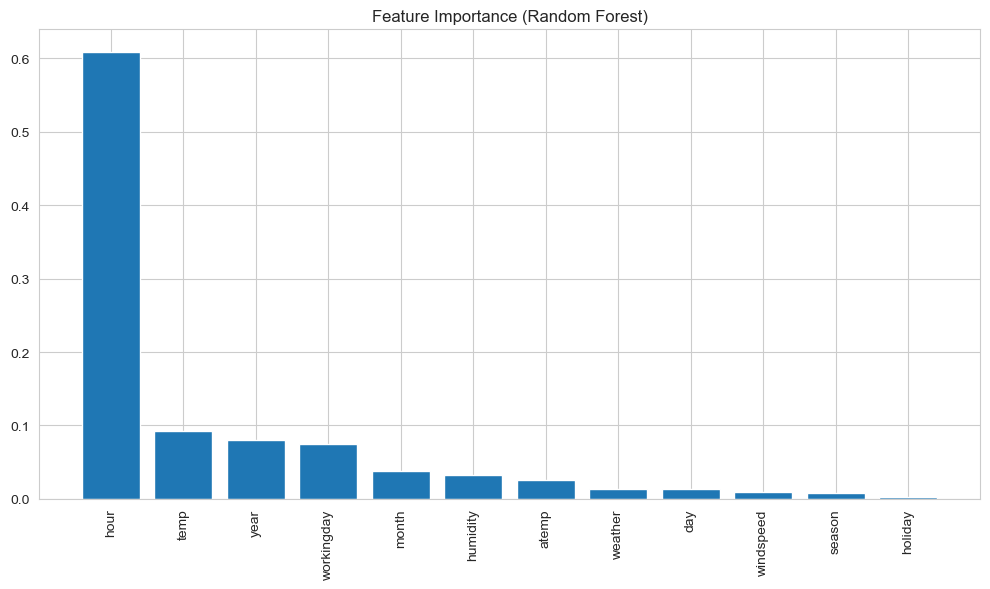

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort and visualize feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# 結論:
hour是最重要的特徵，與常理判斷相符，若租借腳踏車可能在上下班等特殊時段較多，在半夜凌晨可能較少，所以租借數與時間點有高度關聯

# 視覺化random forest回歸模型的預測結果
1. 使用散點圖顯示實際值與預測值
2. 使用折線圖顯示實際值與預測值

Random forest perfomance:


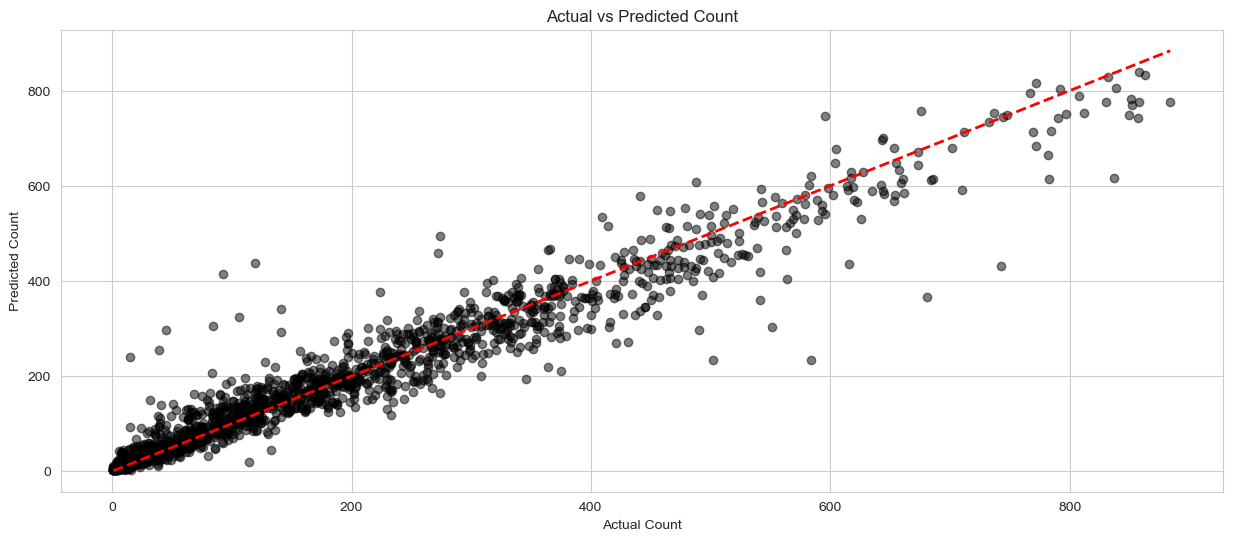

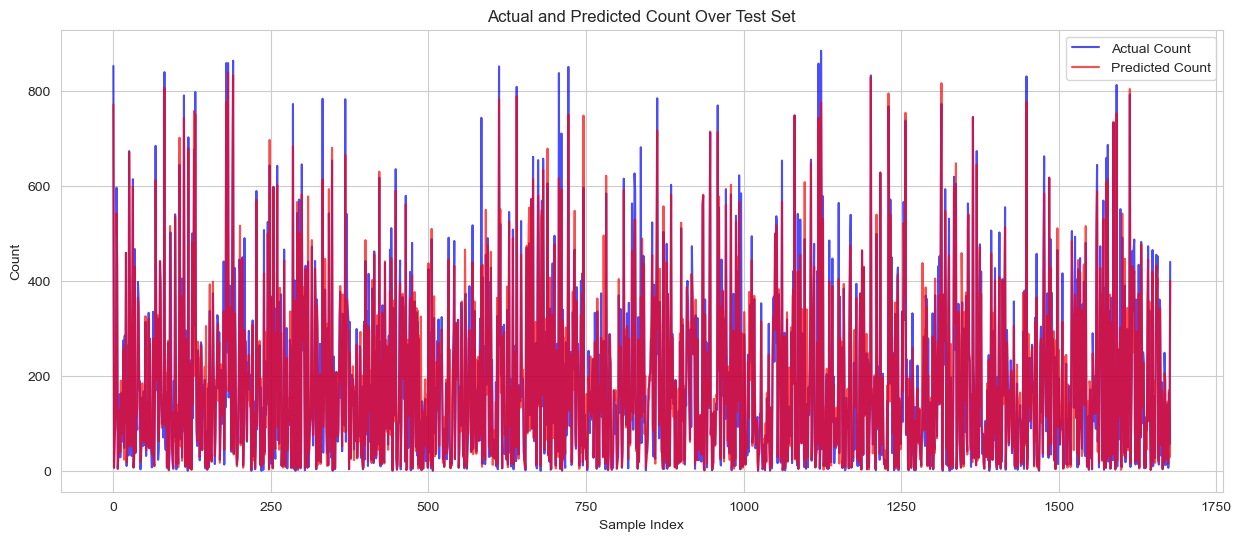

In [19]:
print("Random forest perfomance:")
# Scatter plot with different color
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.5, color='black')
min_val = min(min(y_test), min(y_test_pred_rf))
max_val = max(max(y_test), max(y_test_pred_rf))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y = x)')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count')
plt.show()

# Line plot with different colors and transparency
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Count', alpha=0.7, color='blue')
plt.plot(y_test_pred_rf, label='Predicted Count', alpha=0.7, color='red')
plt.xlabel('Sample Index')
plt.ylabel('Count')
plt.title('Actual and Predicted Count Over Test Set')
plt.legend()
plt.show()

# 結論:
可以看出random forest regression model的表現，預估與實際值有高度相關性，並且重疊度高

# 視覺化polynomial feature performance


Polynomial features performance:


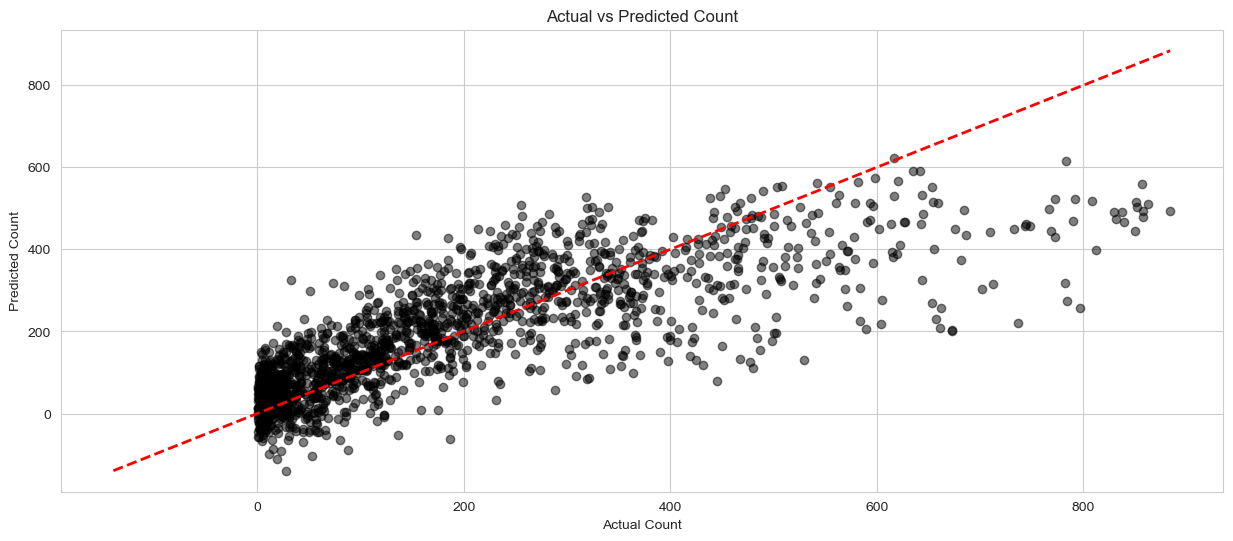

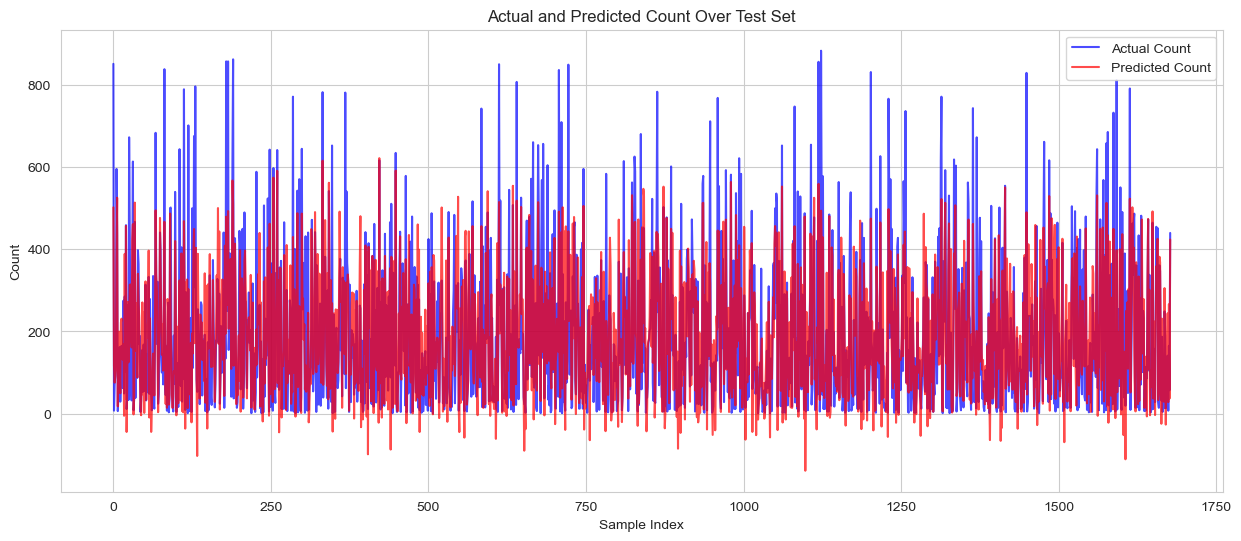

In [20]:
# Scatter plot with different color
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_test_pred_poly, alpha=0.5, color='black')
# Add diagonal line (y = x line)
min_val = min(min(y_test), min(y_test_pred_poly))
max_val = max(max(y_test), max(y_test_pred_poly))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y = x)')

plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count')
print("Polynomial features performance:")
plt.show()

# Line plot with different colors and transparency
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Count', alpha=0.7, color='blue')
plt.plot(y_test_pred_poly, label='Predicted Count', alpha=0.7, color='red')
plt.xlabel('Sample Index')
plt.ylabel('Count')
plt.title('Actual and Predicted Count Over Test Set')
plt.legend()
plt.show()

# 結論:
仍有意定程度相關性與重疊，但表現不如random forest regression model\
透過圖表兩相對比下來很明顯可以知道random forest regression model表現更好

# 匯入測試資料

In [28]:
# todo: predict test data  from HW2_bike-sharing_test.csv
test_file_path = 'HW2_bike-sharing_test.csv'
with open(test_file_path, 'r') as file:
    df_test = pd.read_csv(file)
    
print(df_test.head())
print(df_test.info())

              datetime  season  holiday  workingday  weather   temp   atemp  \
0   2012-12-9 17:00:00       4        0           0        3  14.76  17.425   
1   2011-2-12 20:00:00       1        0           0        1  10.66  12.880   
2  2012-12-12 13:00:00       4        0           1        2  13.94  18.180   
3    2011-7-4 15:00:00       3        1           0        1  33.62  37.120   
4   2012-7-17 14:00:00       3        0           1        1  38.54  41.665   

   humidity  windspeed  
0        93     8.9981  
1        41    15.0013  
2        42     0.0000  
3        43     6.0032  
4        29    16.9979  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    2500 non-null   object 
 1   season      2500 non-null   int64  
 2   holiday     2500 non-null   int64  
 3   workingday  2500 non-null   int64  
 4   weather     2500 n

# 測試資料集處理
1. 將 'datetime' 欄位轉換成 datetime 物件
2. 從 'datetime' 中提取年月日時
3. 刪除 'datetime' 欄位

In [29]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

df_test['hour'] = df_test['datetime'].dt.hour
df_test['day'] = df_test['datetime'].dt.day
df_test['month'] = df_test['datetime'].dt.month
df_test['year'] = df_test['datetime'].dt.year

df_test.drop('datetime', axis=1, inplace=True)

print(df_test.head())

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       4        0           0        3  14.76  17.425        93     8.9981   
1       1        0           0        1  10.66  12.880        41    15.0013   
2       4        0           1        2  13.94  18.180        42     0.0000   
3       3        1           0        1  33.62  37.120        43     6.0032   
4       3        0           1        1  38.54  41.665        29    16.9979   

   hour  day  month  year  
0    17    9     12  2012  
1    20   12      2  2011  
2    13   12     12  2012  
3    15    4      7  2011  
4    14   17      7  2012  


# 訓練資料集特徵相關性

              season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.027362   -0.001532  0.014894  0.262888  0.268983   
holiday     0.027362  1.000000   -0.252029 -0.000918 -0.004418 -0.009505   
workingday -0.001532 -0.252029    1.000000  0.039794  0.031272  0.025938   
weather     0.014894 -0.000918    0.039794  1.000000 -0.051192 -0.051592   
temp        0.262888 -0.004418    0.031272 -0.051192  1.000000  0.984809   
atemp       0.268983 -0.009505    0.025938 -0.051592  0.984809  1.000000   
humidity    0.190349 -0.001714   -0.012453  0.401699 -0.062468 -0.041076   
windspeed  -0.145258  0.017130    0.015609  0.010919 -0.015170 -0.053214   
count       0.161168 -0.006239    0.018654 -0.120870  0.398045  0.394623   
hour       -0.008202  0.002137    0.008759 -0.017208  0.146190  0.141662   
day         0.005697 -0.017320    0.010027 -0.011934  0.012025  0.007977   
month       0.971551 -0.000418    0.002545  0.019063  0.263616  0.270241   
year        

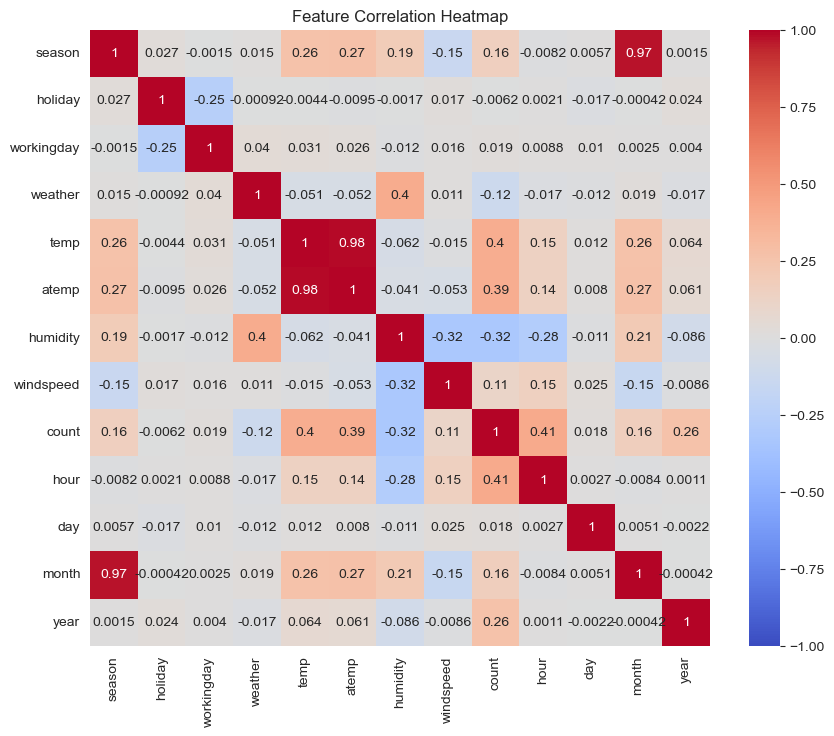

In [41]:
import seaborn as sns
# Assuming df is your DataFrame with features
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)
# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

由上述結果可知，'temp' 與 'atemp' 具有高度相關性，因此我嘗試刪除其中一個特徵 (atemp)。
season 與 month 也具有高度相關性，但由於這兩個特徵的意義不同，因此保留這兩個特徵。

# 刪除 'atemp' 特徵

In [42]:
df_without_atemp = df.copy()
df_without_atemp.drop('atemp', axis=1, inplace=True)
print(df_without_atemp.head())

   season  holiday  workingday  weather  temp  humidity  windspeed  count  \
0       1        0           0        1  9.84        81        0.0     16   
1       1        0           0        1  9.02        80        0.0     40   
2       1        0           0        1  9.02        80        0.0     32   
3       1        0           0        1  9.84        75        0.0     13   
4       1        0           0        1  9.84        75        0.0      1   

   hour  day  month  year  
0     0    1      1  2011  
1     1    1      1  2011  
2     2    1      1  2011  
3     3    1      1  2011  
4     4    1      1  2011  


# 訓練線性回歸模型 (without atemp)

In [43]:
X_without_atemp = df_without_atemp.drop('count', axis=1)
y_without_atemp = df_without_atemp['count']
# 拆分資料集: 80% 訓練集, 20% 測試集
X_train_without_atemp, X_test_without_atemp, y_train_without_atemp, y_test_without_atemp = train_test_split(X_without_atemp, y_without_atemp, test_size=0.2, random_state=42)

#　使用線性回歸模型
model_without_atemp = LinearRegression()
model_without_atemp.fit(X_train_without_atemp, y_train_without_atemp)

y_pred_without_atemp = model_without_atemp.predict(X_test_without_atemp)

mse_without_atemp = mean_squared_error(y_test_without_atemp, y_pred_without_atemp)
print(f'Mean Squared Error (without atemp): {mse_without_atemp}')

Mean Squared Error (without atemp): 18373.235884655878


mse反而因此增加，說明 'atemp' 特徵(即便與temp有高度相關性)對於模型預測有正面影響，無須移除。

# 使用random forest regression model進行預測

In [46]:
y_pred_from_test_file = rf_model.predict(df_test)
print(len(y_pred_from_test_file))

2500


# 匯出預測結果

In [47]:
# Create a DataFrame from the predictions
predictions_df = pd.DataFrame(y_pred_from_test_file, columns=['count'])

# Save the DataFrame to a CSV file
predictions_df.to_csv('HW2_ bike-sharing _test_sol.csv', index=False)

#　需要化整數?
